In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/kumarmayank/Downloads/Dataset_modified_pom.csv')

In [3]:
df = df.drop(['Product Availibility index','City'],axis=1)

In [4]:
df

,Date,MRP,Q1,DR1,SP,Q2,DR2,MSP,Q3,DR3,...,General Discount,GD%,Quantity ( kg ).1,Total Market Value ( in Thousands ),D-S Ratio,Avg. Correlation ( MRP Vs SP ),Avg. Correlation ( MRP Vs MSP ),Avg. Correlation ( MSP Vs SP ),Avg. Correlation ( MRP Vs BP ),Avg. Correlation ( SP Vs BP )
0,29-06-2010,25.000000,8991.208651,0.479115,19.000000,7756.987931,0.413347,17.540001,2018.103418,0.107539,...,4.865000,19.459999,18766.3,4.691575e+05,1,0.999425,0.999389,0.999575,0.999726,0.999726
1,30-06-2010,30.420000,11620.979200,0.676145,25.790001,4337.489510,0.252369,23.299999,1228.631295,0.071486,...,4.095000,13.461538,17187.1,5.228316e+05,1,0.999425,0.999389,0.999575,0.999726,0.999726
2,01-07-2010,25.920000,6626.851584,0.806304,25.000000,277.064623,0.033711,20.270000,1314.883794,0.159985,...,1.872500,7.224151,8218.8,2.130313e+05,1,0.999425,0.999389,0.999575,0.999726,0.999726
3,02-07-2010,23.100000,831.227431,0.161724,23.000000,3447.359568,0.670719,18.709999,861.213001,0.167558,...,1.147500,4.967534,5139.8,1.187294e+05,1,0.999425,0.999389,0.999575,0.999726,0.999726
4,06-07-2010,20.000000,4094.484300,0.596264,20.000000,305.613267,0.044505,15.830000,2466.802433,0.359231,...,1.042500,5.212500,6866.9,1.373380e+05,1,0.999425,0.999389,0.999575,0.999726,0.999726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,28-01-2020,576.809998,11015.909150,0.934462,568.489990,145.185080,0.012316,558.080017,627.405771,0.053222,...,8.842499,1.533000,11788.5,6.799725e+06,1,0.999425,0.999389,0.999575,0.999726,0.999726
2412,29-01-2020,589.799988,8886.840999,0.499219,575.690002,7663.141670,0.430477,567.429993,1251.517331,0.070304,...,12.647492,2.144370,17801.5,1.049932e+07,1,0.999425,0.999389,0.999575,0.999726,0.999726
2413,30-01-2020,650.880005,10112.532670,0.348639,632.419983,14988.369910,0.516739,618.000000,3904.797418,0.134622,...,17.450012,2.680988,29005.7,1.887923e+07,1,0.999425,0.999389,0.999575,0.999726,0.999726
2414,31-01-2020,653.000000,388.073012,0.024688,640.000000,12032.185610,0.765440,632.520020,3299.041379,0.209872,...,11.619995,1.779479,15719.3,1.026470e+07,1,0.999425,0.999389,0.999575,0.999726,0.999726


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
# Assuming df is your DataFrame with 'Date', 'MRP', 'SP', and 'MSP' columns

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

/var/folders/rw/z1h7_zz967sf8xy_601yr3cw0000gn/T/ipykernel_10749/767929913.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Features (X) and target variables (y)
X = df[['Year', 'Month', 'Day']]
y_mrp = df['MRP']
y_sp = df['SP']
y_msp = df['MSP']

# Split the data into training and testing sets
X_train, X_test, y_mrp_train, y_mrp_test, y_sp_train, y_sp_test, y_msp_train, y_msp_test = train_test_split(
    X, y_mrp, y_sp, y_msp, test_size=0.2, random_state=42
)

In [8]:
# Create Linear Regression models for each target variable
lr_model_mrp = LinearRegression()
lr_model_sp = LinearRegression()
lr_model_msp = LinearRegression()

In [9]:
# Train the models
lr_model_mrp.fit(X_train, y_mrp_train)

LinearRegression()

In [10]:
lr_model_sp.fit(X_train, y_sp_train)

LinearRegression()

In [11]:
lr_model_msp.fit(X_train, y_msp_train)

LinearRegression()

In [12]:
# Make predictions on the test set
y_mrp_pred = lr_model_mrp.predict(X_test)
y_sp_pred = lr_model_sp.predict(X_test)
y_msp_pred = lr_model_msp.predict(X_test)

In [13]:
# Evaluate the models (using Mean Squared Error in this example)
mse_mrp = mean_squared_error(y_mrp_test, y_mrp_pred)
mse_sp = mean_squared_error(y_sp_test, y_sp_pred)
mse_msp = mean_squared_error(y_msp_test, y_msp_pred)

print(f"Mean Squared Error for MRP: {mse_mrp}")
print(f"Mean Squared Error for SP: {mse_sp}")
print(f"Mean Squared Error for MSP: {mse_msp}")

Mean Squared Error for MRP: 3176.3588829314117
Mean Squared Error for SP: 3090.4437318357236
Mean Squared Error for MSP: 2969.614215334054


In [14]:
# Make predictions on the entire dataset for plotting
df['MRP_Pred_LR'] = lr_model_mrp.predict(X)
df['SP_Pred_LR'] = lr_model_sp.predict(X)
df['MSP_Pred_LR'] = lr_model_msp.predict(X)

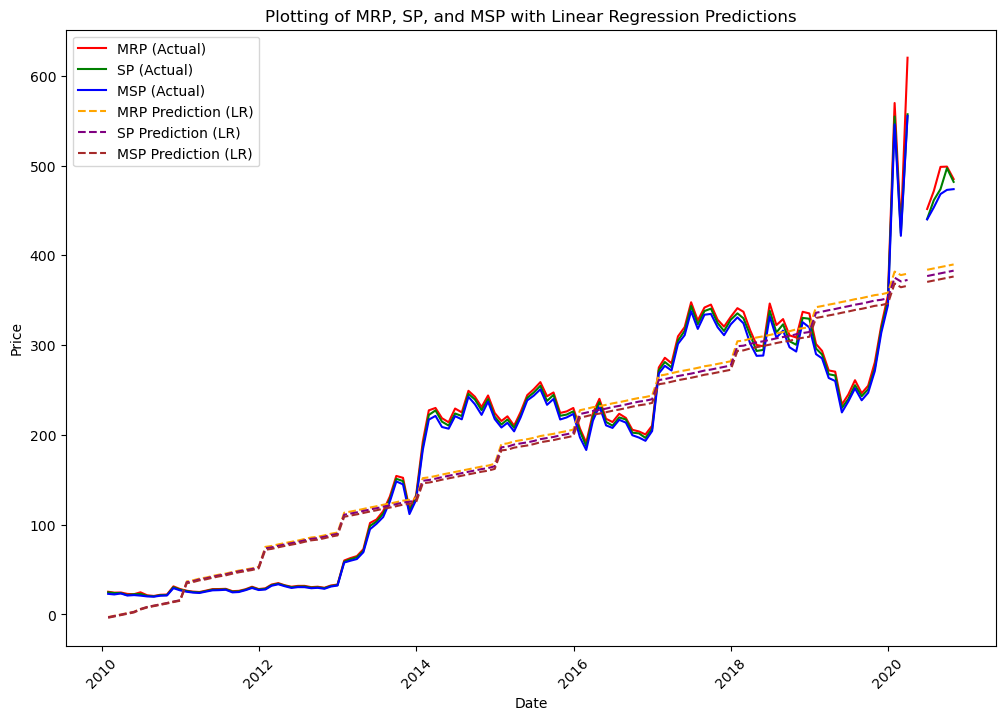

In [15]:
# Downsample by aggregating into monthly averages
df_resampled = df.resample('M', on='Date').mean()

# Create the time series plot
plt.figure(figsize=(12, 8))

# Plotting the actual data
plt.plot(df_resampled['MRP'], label='MRP (Actual)', color='red')
plt.plot(df_resampled['SP'], label='SP (Actual)', color='green')
plt.plot(df_resampled['MSP'], label='MSP (Actual)', color='blue')

# Plotting the Linear Regression predictions
plt.plot(df_resampled['MRP_Pred_LR'], label='MRP Prediction (LR)', linestyle='dashed', color='orange')
plt.plot(df_resampled['SP_Pred_LR'], label='SP Prediction (LR)', linestyle='dashed', color='purple')
plt.plot(df_resampled['MSP_Pred_LR'], label='MSP Prediction (LR)', linestyle='dashed', color='brown')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Plotting of MRP, SP, and MSP with Linear Regression Predictions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()